In [2]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
# Step 2: Load Dataset
dataset = pd.read_csv("wine_data.csv")  # Update with your dataset file
X = dataset.iloc[:, :-1].values  # Features (all columns except last)
y = dataset.iloc[:, -1].values   # Target (last column - Wine Quality)

In [4]:
# Step 3: Encode Labels (If needed)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Convert categorical labels to numerical

In [5]:
# Step 4: Feature Scaling (Standardization)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 6: Build ANN Model
model = Sequential([
    Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)),  # Input Layer
    Dropout(0.3),  # Prevent Overfitting
    Dense(units=64, activation='relu'),
    Dropout(0.2),
    Dense(units=32, activation='relu'),
    Dense(units=len(np.unique(y)), activation='softmax')  # Output Layer (Softmax for Multi-class)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Step 7: Compile Model
optimizer = Adam(learning_rate=0.001)  # Adaptive learning rate
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Step 8: Train Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

Epoch 1/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2624 - loss: 1.7096 - val_accuracy: 0.2902 - val_loss: 1.5951
Epoch 2/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3079 - loss: 1.5784 - val_accuracy: 0.2948 - val_loss: 1.5831
Epoch 3/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3021 - loss: 1.5757 - val_accuracy: 0.2917 - val_loss: 1.5797
Epoch 4/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3066 - loss: 1.5673 - val_accuracy: 0.2993 - val_loss: 1.5782
Epoch 5/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3118 - loss: 1.5619 - val_accuracy: 0.3057 - val_loss: 1.5743
Epoch 6/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3042 - loss: 1.5718 - val_accuracy: 0.2921 - val_loss: 1.5773
Epoch 7/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3174 - loss: 1.5569 - val_accuracy: 0.3029 - val_loss: 1.5683
Epoch 8/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3224 - loss: 1.5512 - val_accu

In [10]:
# Step 9: Evaluate Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3810 - loss: 1.5063
Test Accuracy: 38.05%


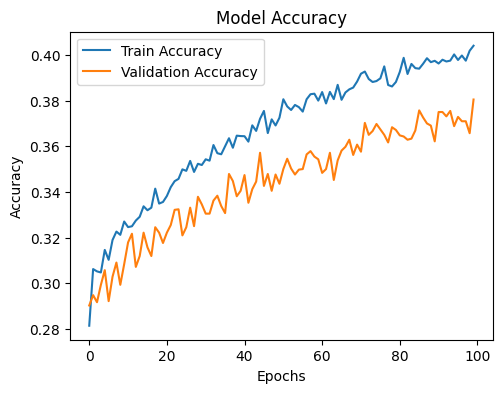

In [11]:
# Step 10: Plot Accuracy & Loss Curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

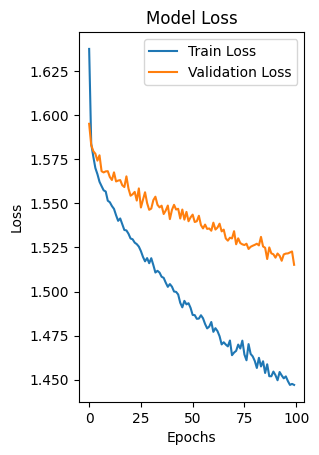

In [12]:
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()